# Alexander Albon

<img src="https://www.formula1.com/content/fom-website/en/drivers/alexander-albon/_jcr_content/image.img.1920.medium.jpg/1646750995556.jpg" width="300">

### Team: Williams 

<img src ="https://www.formula1.com/content/fom-website/en/drivers/alexander-albon/_jcr_content/helmet.img.png/1646824579444.png" width="200">



In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip

── Attaching packages ────────────────────────────────────── tidymodels 0.1.3 ──

✔ broom        0.7.12     ✔ rsample      0.1.1 
✔ dials        0.1.0      ✔ tune         0.1.6 
✔ infer        1.0.0      ✔ workflows    0.2.4 
✔ modeldata    0.1.1      ✔ workflowsets 0.1.0 
✔ parsnip      0.1.7      ✔ yardstick    0.0.9 
✔ recipes      0.1.17     

Warning message

In [2]:
initialize_master()

Rows: 79 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): circuitRef, name, location, country, alt, url
dbl (3): circuitId, lat, lng


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 12716 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): positionText
dbl (6): constructorStandingsId, raceId, constructorId, points, position, wins


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 11950 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): status
dbl (4): constructorResultsId, raceId, constructorId, points


ℹ Use `spec()` to retrieve the full column specification for this

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

# Filtering Lap Data For Individual Driver

alb_laps <- lap_data %>%
            filter(driverId == 848)

# Season Analysis

`geom_smooth()` using formula 'y ~ x'



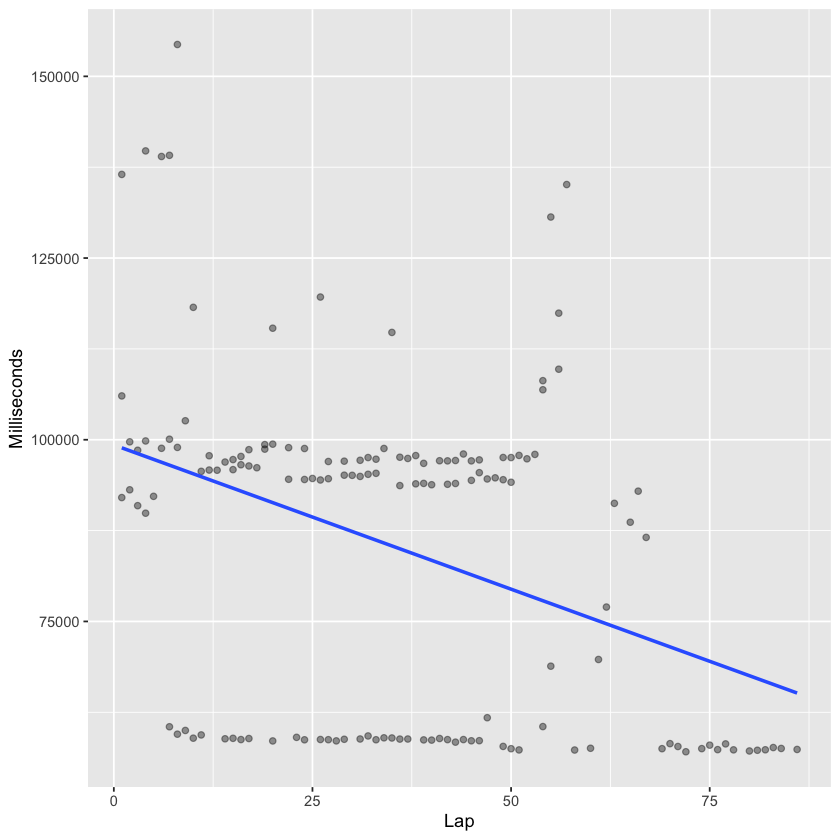

In [4]:
#1. Bahrain 

### UNIQUE DATA

aa_bahrain <- alb_laps %>%
                filter(raceId %in% bahrain_race_ID) 

aa_bahrain_clean <- aa_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))

aa_bahrain_clean_ID <- aa_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_bahrain_races <- alb_laps %>%
                    filter(raceId %in% aa_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(aa_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()


In [5]:
# #2. Saudi Arabia

# aa_saudi <- alb_laps %>%
#                 filter(raceId %in% saudi_race_ID) 

# aa_saudi_clean <- aa_saudi %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 

# aa_saudi_clean_ID <- aa_saudi_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# aa_saudi_races <- alb_laps %>%
#                     filter(raceId %in% aa_saudi_clean_ID)

# formulaone_split <- initial_split(aa_saudi_races, prop = 0.75, strata = milliseconds)

# ### SPLITS DATA

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



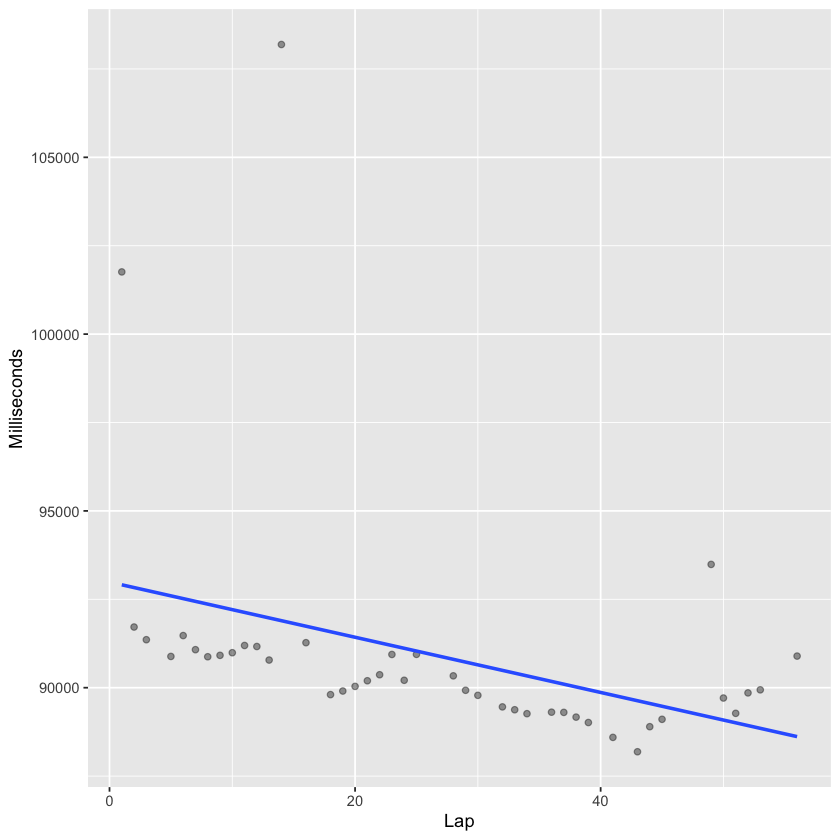

In [7]:
#3. Australia

aa_aus <- alb_laps %>%
                filter(raceId %in% aus_race_ID) 

aa_aus_clean <- aa_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

aa_aus_clean_ID <- aa_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_aus_races <- alb_laps %>%
                    filter(raceId %in% aa_aus_clean_ID)

formulaone_split <- initial_split(aa_aus_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

raceId,n
<dbl>,<int>
1043,63


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



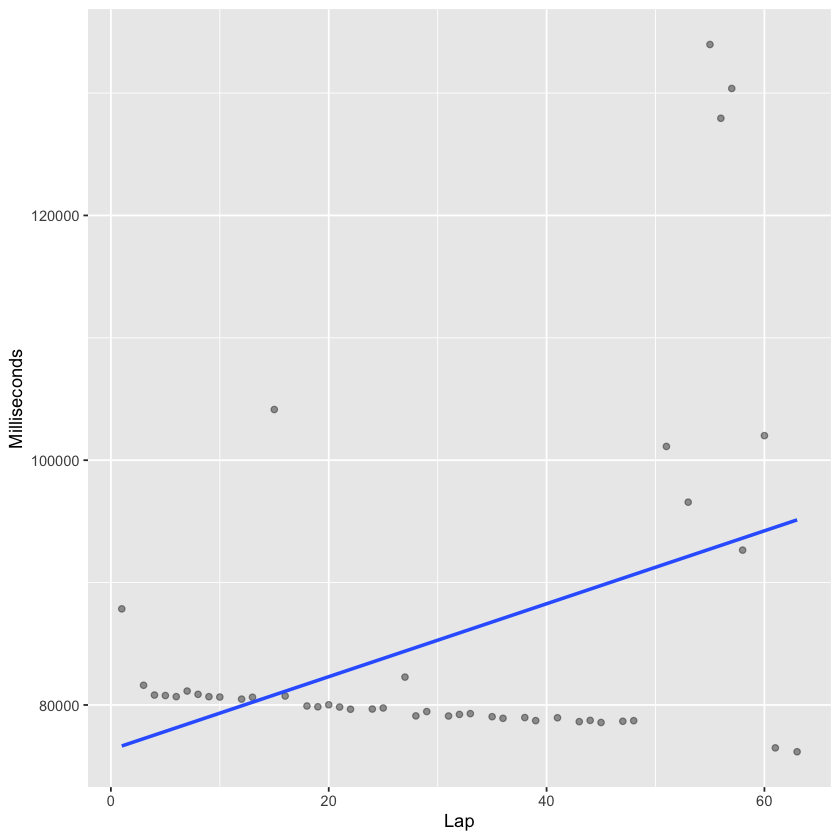

In [9]:
#4. Italy, Imola

aa_imola <- alb_laps %>%
                filter(raceId %in% imola_race_ID) 

aa_imola_clean <- aa_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
aa_imola_clean
aa_imola_clean_ID <- aa_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_imola_races <- alb_laps %>%
                    filter(raceId %in% aa_imola_clean_ID)

formulaone_split <- initial_split(aa_imola_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

raceId,n
<dbl>,<int>
1044,58


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



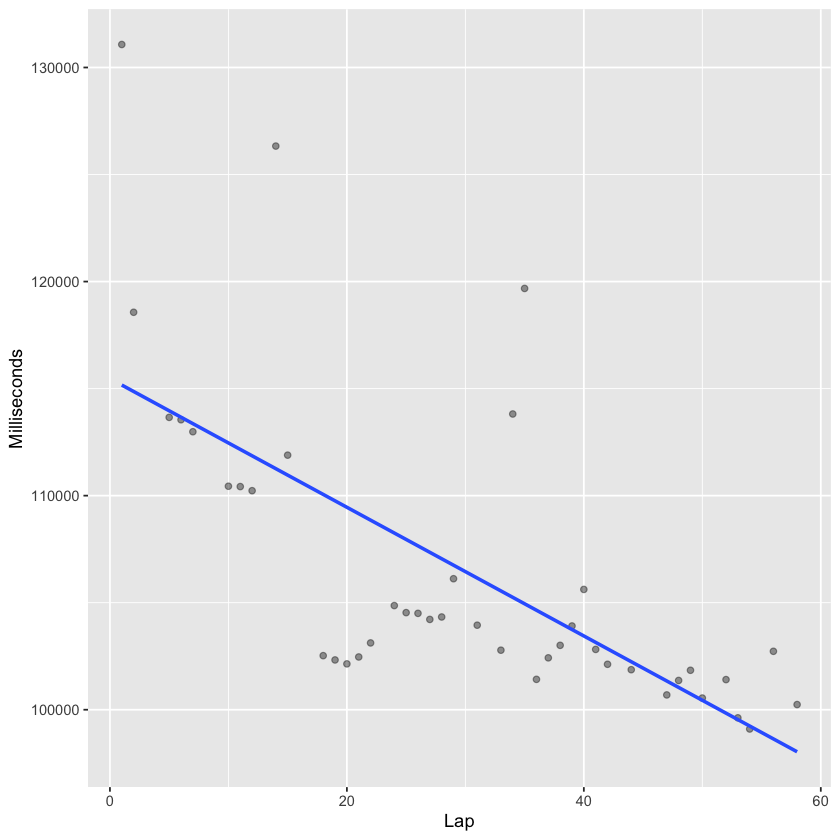

In [11]:
#5. Turkey (Replacing Miami)

aa_turkey <- alb_laps %>%
                filter(raceId %in% turkey_race_ID) 

aa_turkey_clean <- aa_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
aa_turkey_clean
aa_turkey_clean_ID <- aa_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_turkey_races <- alb_laps %>%
                    filter(raceId %in% aa_turkey_clean_ID)

formulaone_split <- initial_split(aa_turkey_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



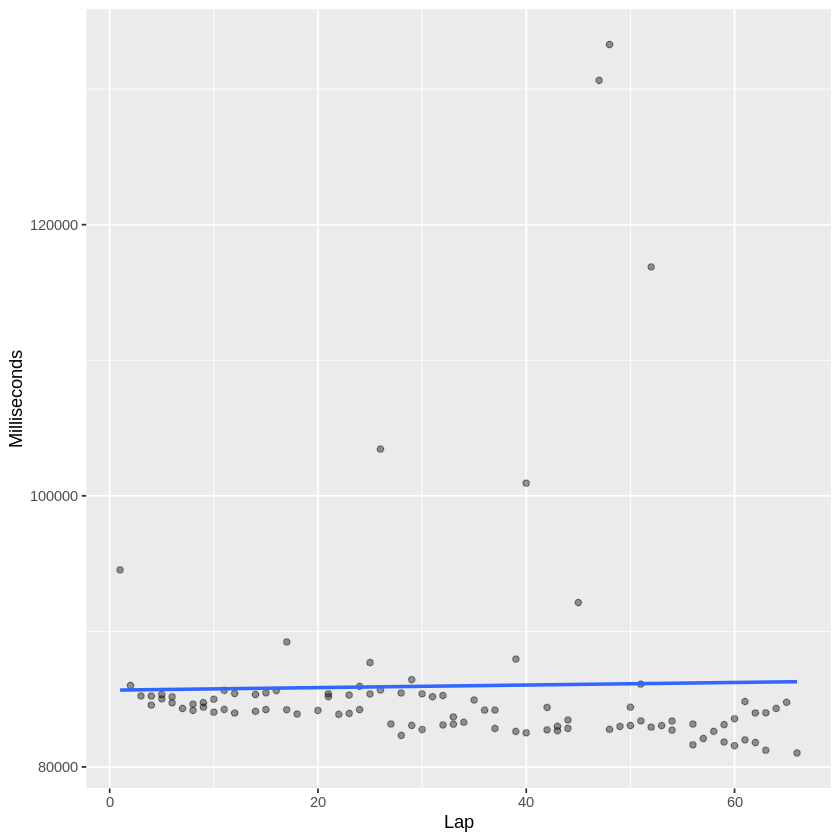

In [35]:
#6. Spain

aa_spain <- alb_laps %>%
                filter(raceId %in% spain_race_ID) 

aa_spain_clean <- aa_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

aa_spain_clean_ID <- aa_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_spain_races <- alb_laps %>%
                    filter(raceId %in% aa_spain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(aa_spain_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1015,78


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



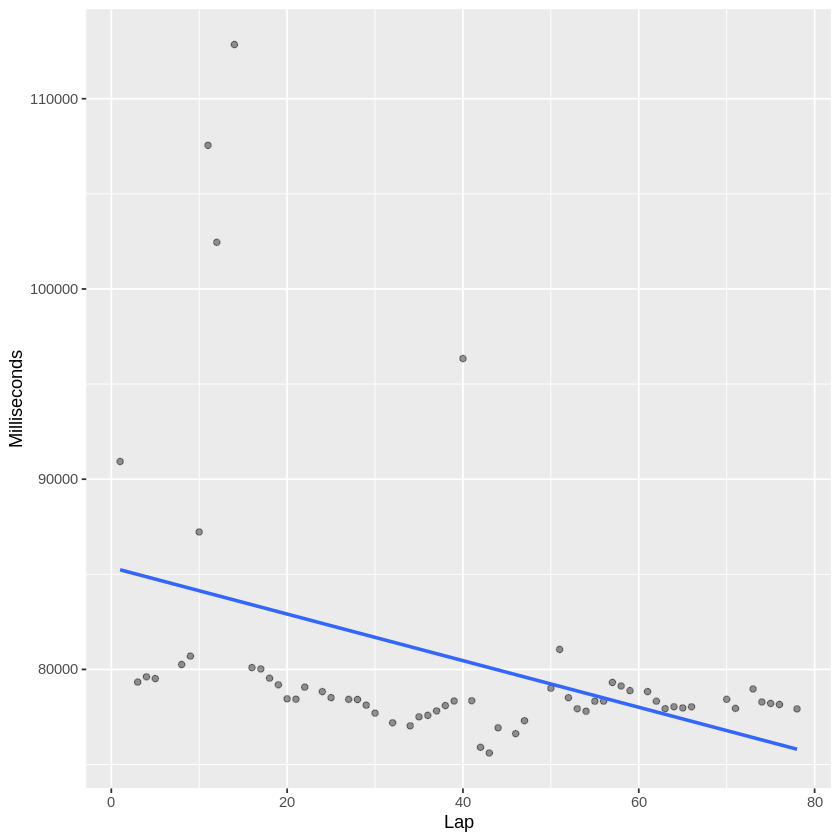

In [36]:
#7. Monaco

aa_monaco <- alb_laps %>%
                filter(raceId %in% monaco_race_ID) 

aa_monaco_clean <- aa_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
aa_monaco_clean
aa_monaco_clean_ID <- aa_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_monaco_races <- alb_laps %>%
                    filter(raceId %in% aa_monaco_clean_ID)

formulaone_split <- initial_split(aa_monaco_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1013,50


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



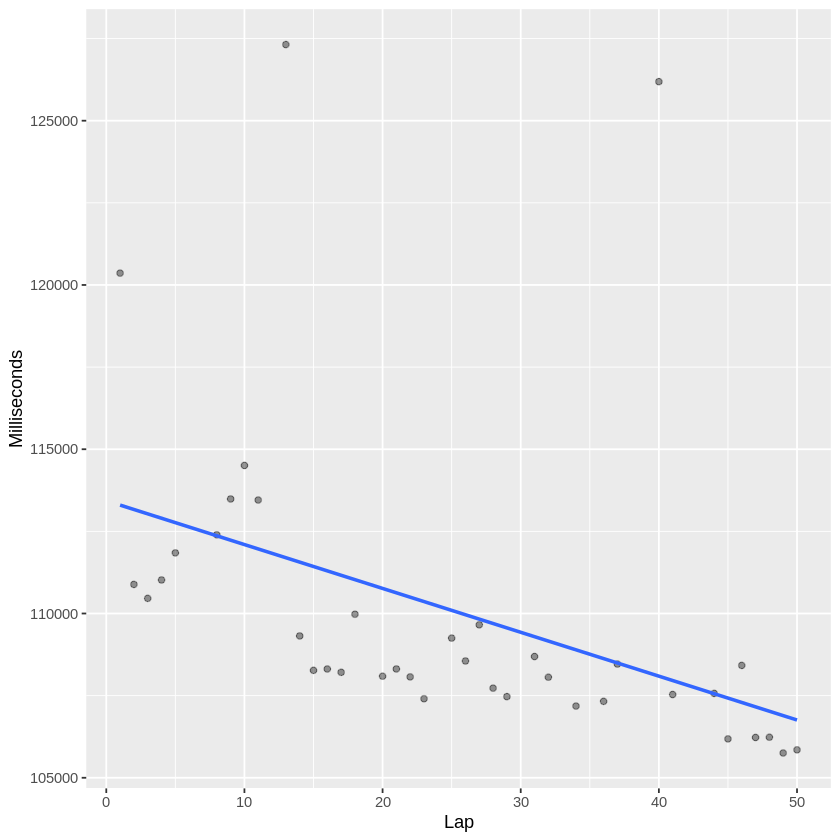

In [37]:
#8. Azerbaijan

aa_azerbaijan <- alb_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

aa_azerbaijan_clean <- aa_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
aa_azerbaijan_clean
aa_azerbaijan_clean_ID <- aa_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_azerbaijan_races <- alb_laps %>%
                    filter(raceId %in% aa_azerbaijan_clean_ID)

formulaone_split <- initial_split(aa_azerbaijan_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1016,59


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



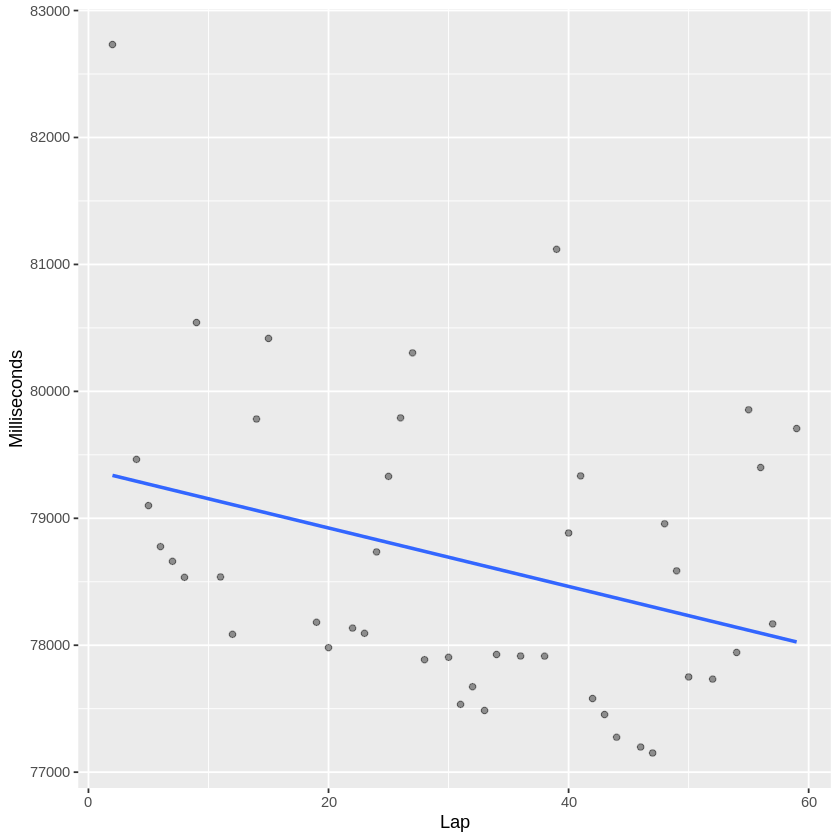

In [38]:
#9. Canada

aa_canada <- alb_laps %>%
                filter(raceId %in% canada_race_ID) 

aa_canada_clean <- aa_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
aa_canada_clean
aa_canada_clean_ID <- aa_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_canada_races <- alb_laps %>%
                    filter(raceId %in% aa_canada_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(aa_canada_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



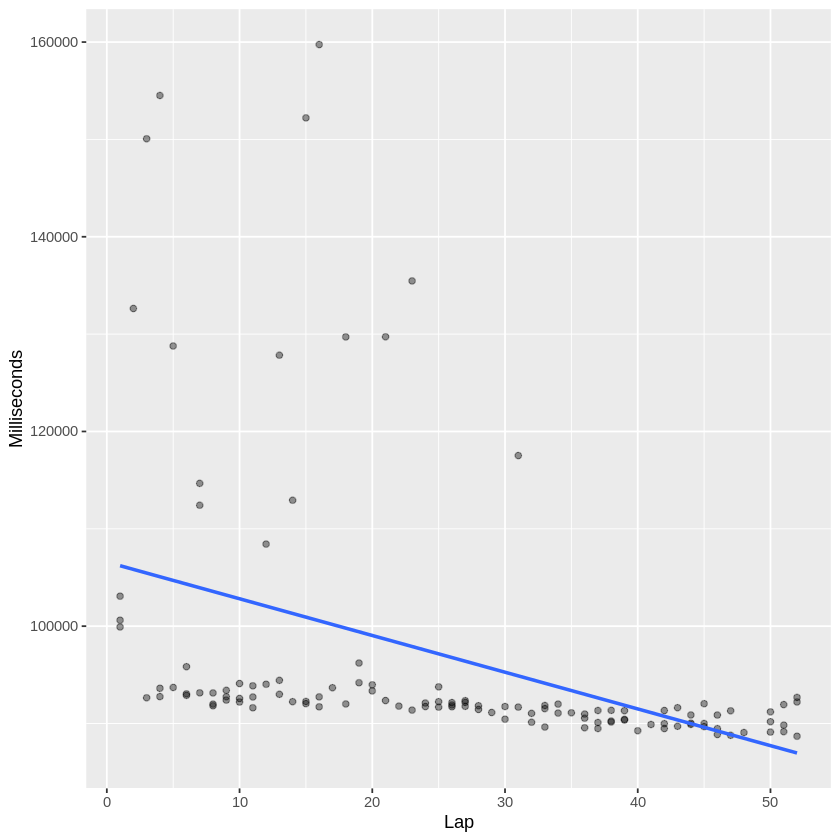

In [39]:
#10. Great Britain

aa_uk <- alb_laps %>%
                filter(raceId %in% uk_race_ID) 

aa_uk_clean <- aa_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

aa_uk_clean_ID <- aa_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_uk_races <- alb_laps %>%
                    filter(raceId %in% aa_uk_clean_ID)

formulaone_split <- initial_split(aa_uk_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



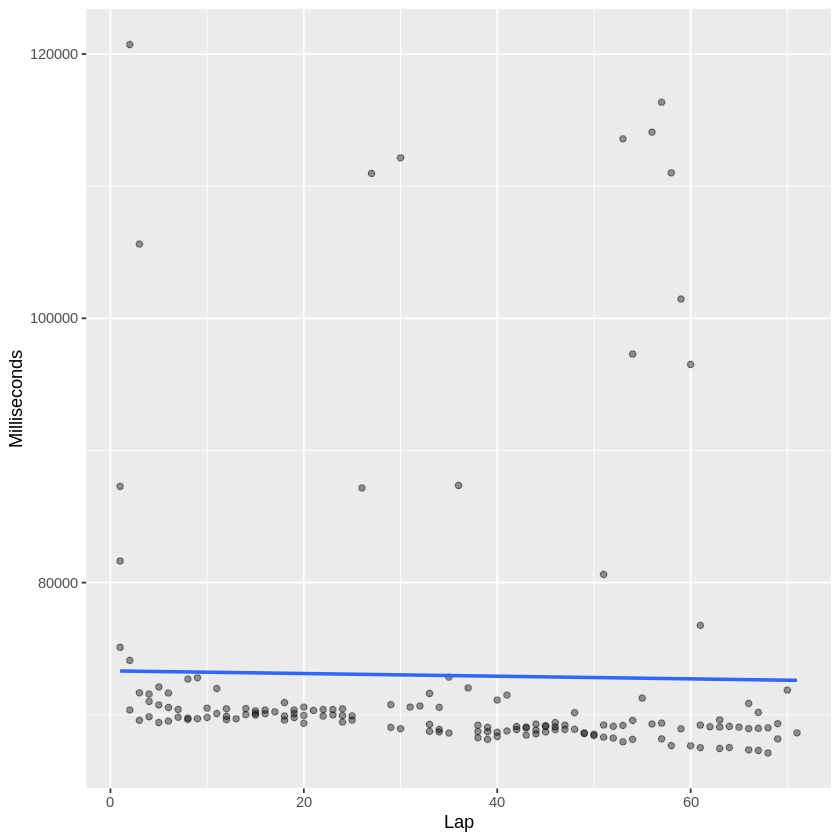

In [40]:
#11. Austria

aa_austria <- alb_laps %>%
                filter(raceId %in% austria_race_ID) 

aa_austria_clean <- aa_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

aa_austria_clean_ID <- aa_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_austria_races <- alb_laps %>%
                    filter(raceId %in% aa_austria_clean_ID)

formulaone_split <- initial_split(aa_austria_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1017,52


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



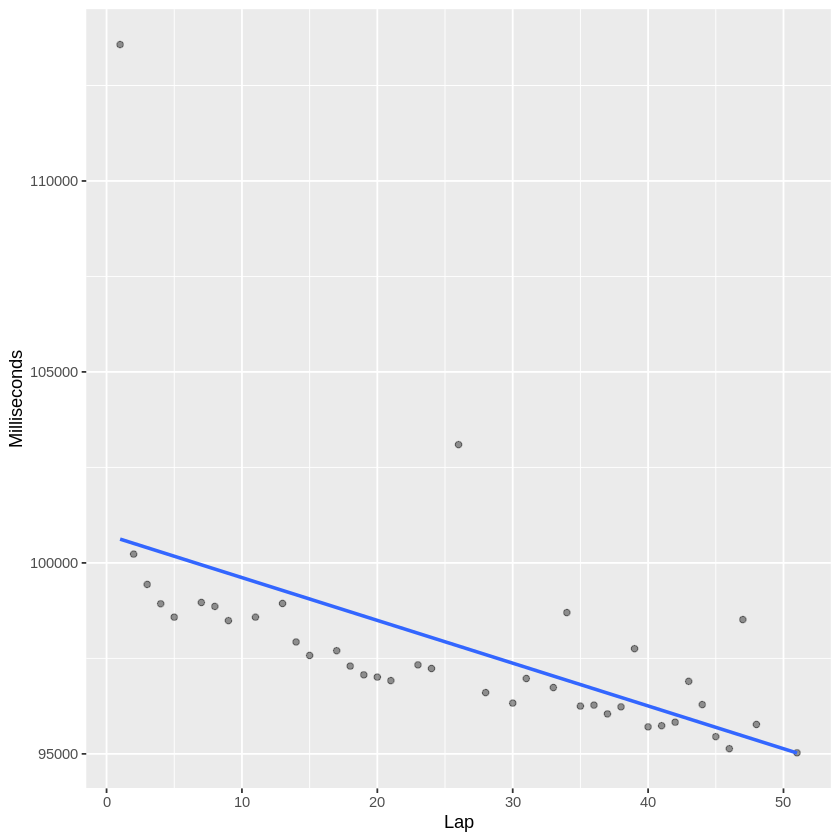

In [41]:
#12. France

aa_france <- alb_laps %>%
                filter(raceId %in% france_race_ID) 

aa_france_clean <- aa_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
aa_france_clean
aa_france_clean_ID <- aa_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_france_races <- alb_laps %>%
                    filter(raceId %in% aa_france_clean_ID)

formulaone_split <- initial_split(aa_france_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



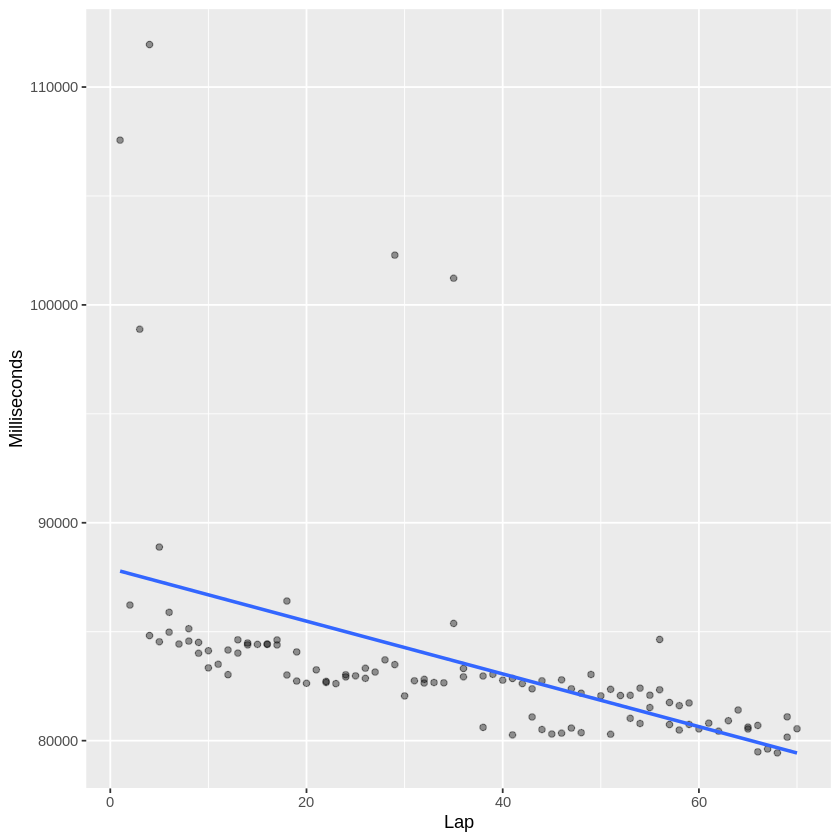

In [42]:
#13.  Hungary

aa_hungary <- alb_laps %>%
                filter(raceId %in% hungary_race_ID) 

aa_hungary_clean <- aa_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
                     

aa_hungary_clean_ID <- aa_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_hungary_races <- alb_laps %>%
                    filter(raceId %in% aa_hungary_clean_ID)

formulaone_split <- initial_split(aa_hungary_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1022,44
1037,44


`geom_smooth()` using formula 'y ~ x'



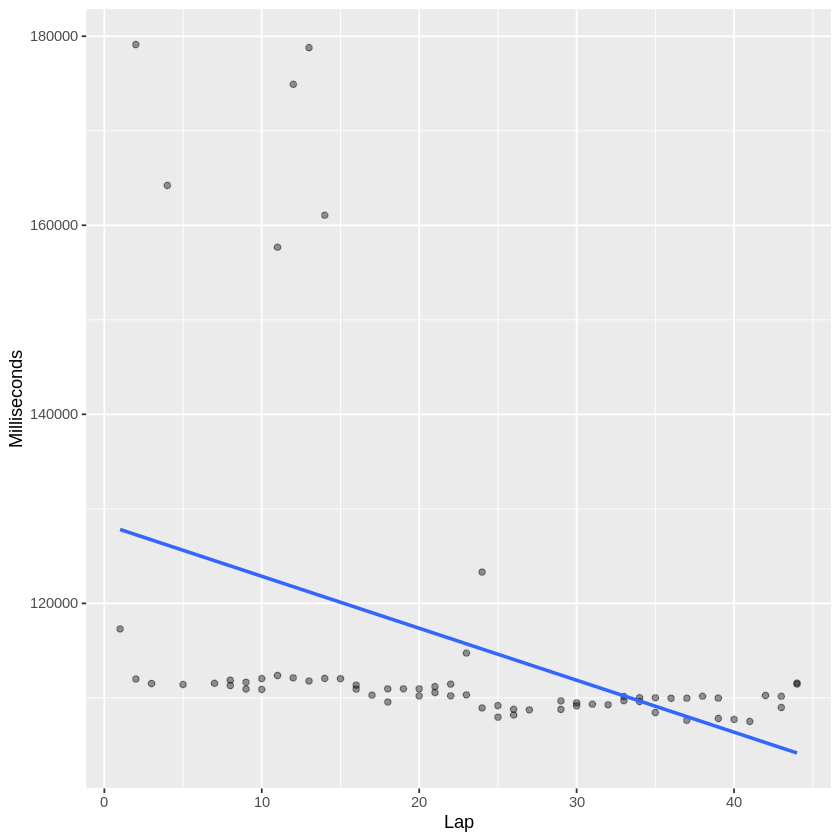

In [43]:
#14. Belgium

aa_belgium <- alb_laps %>%
                filter(raceId %in% belgium_race_ID) 

aa_belgium_clean <- aa_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
aa_belgium_clean
aa_belgium_clean_ID <- aa_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_belgium_races <- alb_laps %>%
                    filter(raceId %in% aa_belgium_clean_ID)

formulaone_split <- initial_split(aa_belgium_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

In [44]:
# #15. Netherlands

# aa_netherlands <- alb_laps %>%
#                 filter(raceId %in% netherlands_race_ID) 

# aa_netherlands_clean <- aa_netherlands %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# aa_netherlands_clean
# aa_netherlands_clean_ID <- aa_netherlands_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# aa_netherlands_races <- alb_laps %>%
#                     filter(raceId %in% aa_netherlands_clean_ID)

# formulaone_split <- initial_split(aa_netherlands_races, prop = 0.75, strata = milliseconds)

# ### SPLITS DATA

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1023,53
1038,53


`geom_smooth()` using formula 'y ~ x'



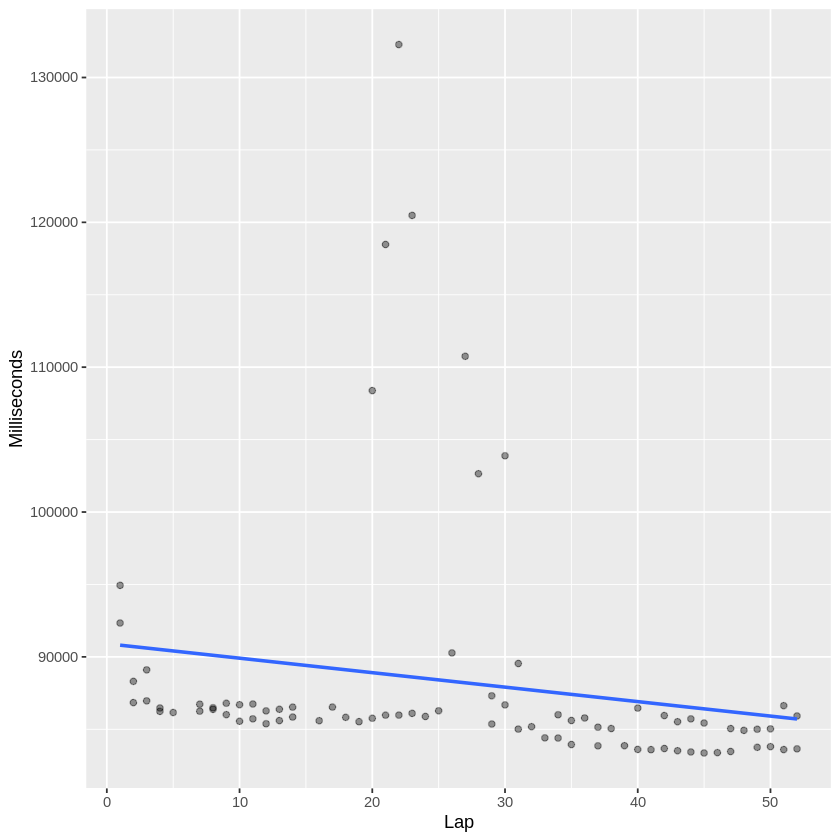

In [45]:
#16. Italy, Monza

aa_monza <- alb_laps %>%
                filter(raceId %in% monza_race_ID) 

aa_monza_clean <- aa_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
aa_monza_clean
aa_monza_clean_ID <- aa_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_monza_races <- alb_laps %>%
                    filter(raceId %in% aa_monza_clean_ID)

formulaone_split <- initial_split(aa_monza_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



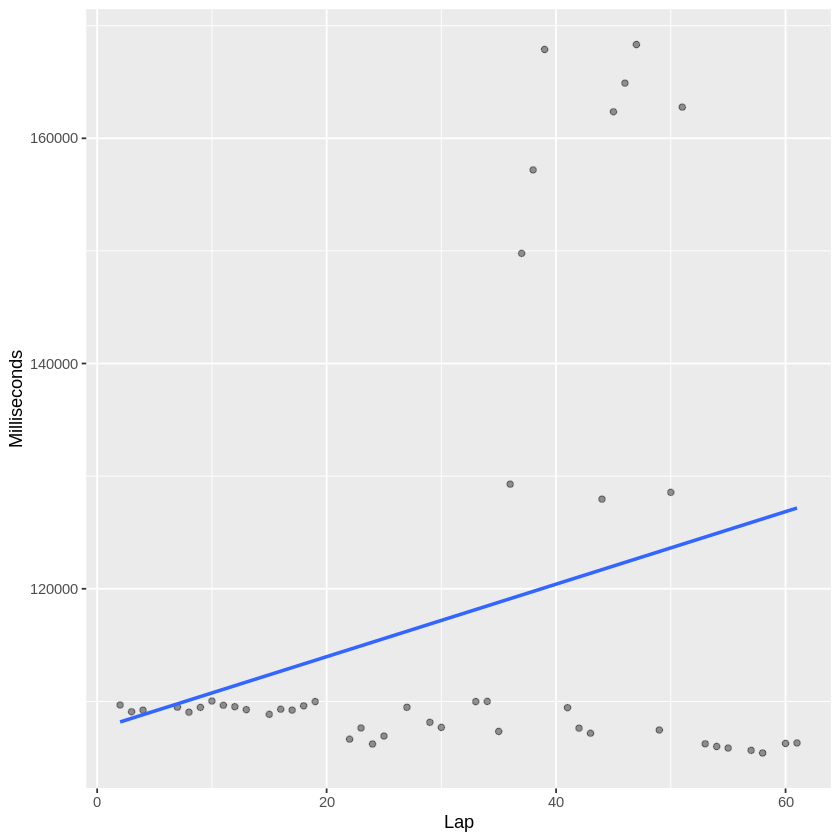

In [46]:
#17. Singapore

aa_singapore <- alb_laps %>%
                filter(raceId %in% singapore_race_ID) 

aa_singapore_clean <- aa_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

aa_singapore_clean_ID <- aa_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_singapore_races <- alb_laps %>%
                    filter(raceId %in% aa_singapore_clean_ID)

formulaone_split <- initial_split(aa_singapore_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



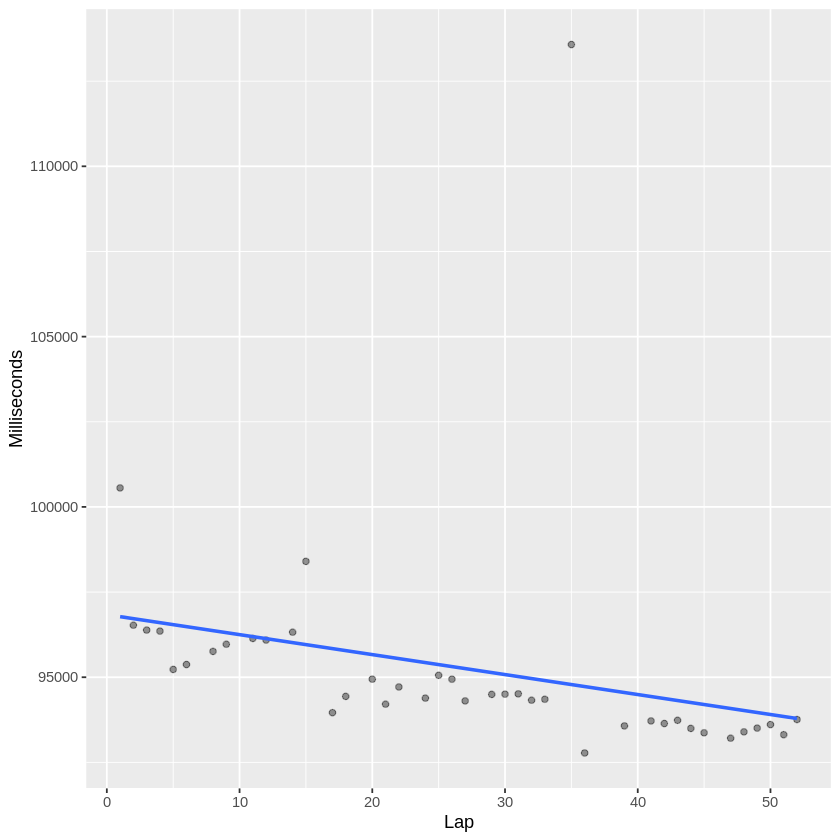

In [47]:
#18. Japan

aa_japan <- alb_laps %>%
                filter(raceId %in% japan_race_ID) 

aa_japan_clean <- aa_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
aa_japan_clean_ID <- aa_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_japan_races <- alb_laps %>%
                    filter(raceId %in% aa_japan_clean_ID)

formulaone_split <- initial_split(aa_japan_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



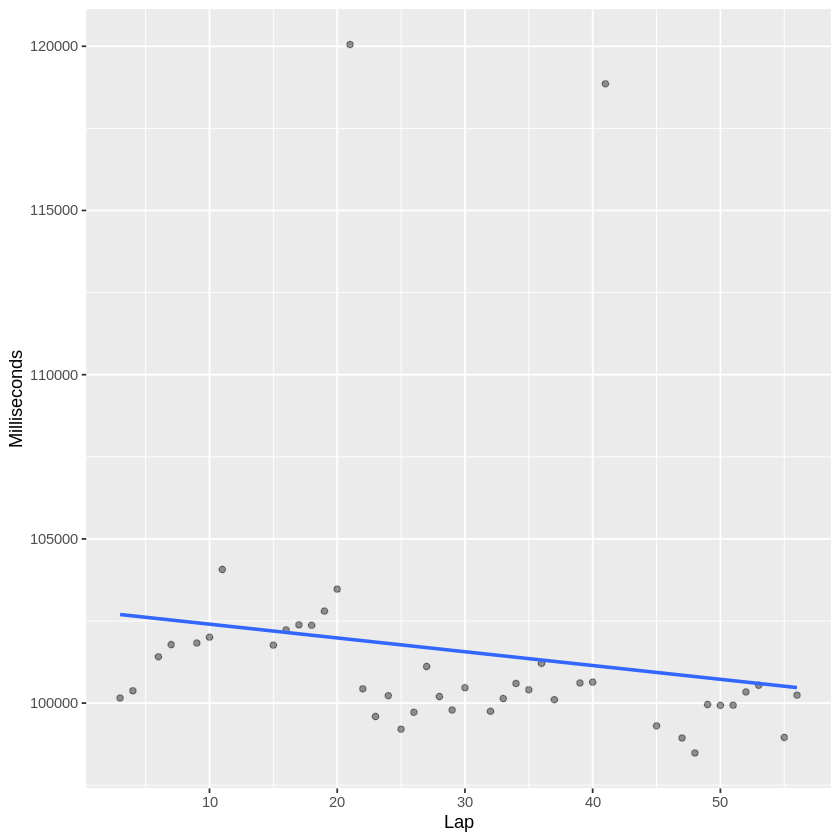

In [48]:
#19. USA, Austin

aa_austin <- alb_laps %>%
                filter(raceId %in% austin_race_ID) 

aa_austin_clean <- aa_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

aa_austin_clean_ID <- aa_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_austin_races <- alb_laps %>%
                    filter(raceId %in% aa_austin_clean_ID)

formulaone_split <- initial_split(aa_austin_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



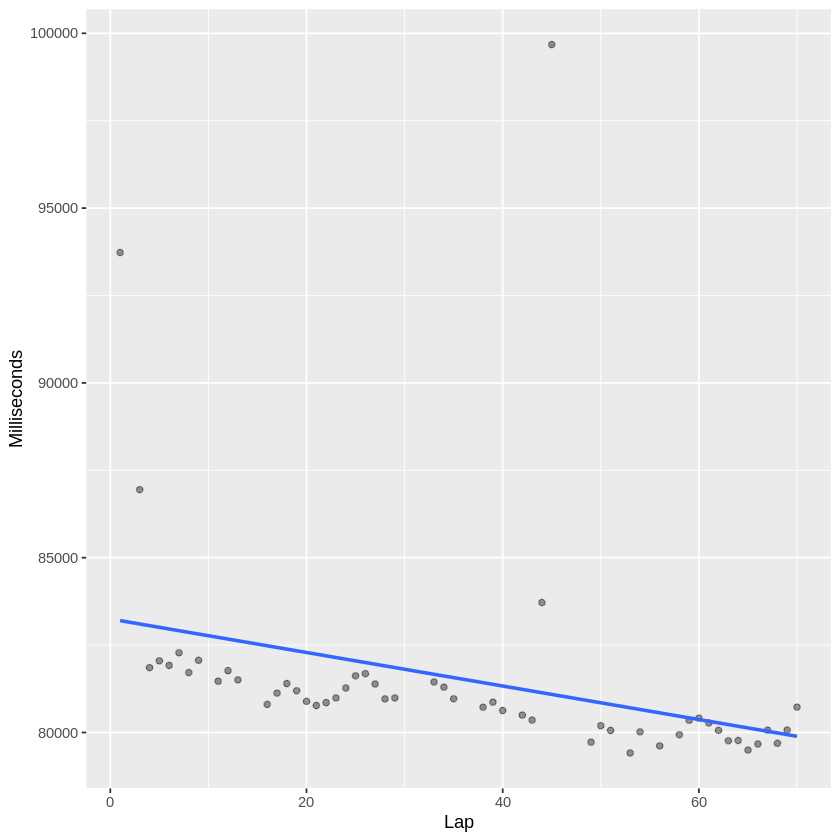

In [49]:
#20. Mexico

aa_mexico <- alb_laps %>%
                filter(raceId %in% mexico_race_ID) 

aa_mexico_clean <- aa_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

aa_mexico_clean_ID <- aa_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_mexico_races <- alb_laps %>%
                    filter(raceId %in% aa_mexico_clean_ID)

formulaone_split <- initial_split(aa_mexico_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



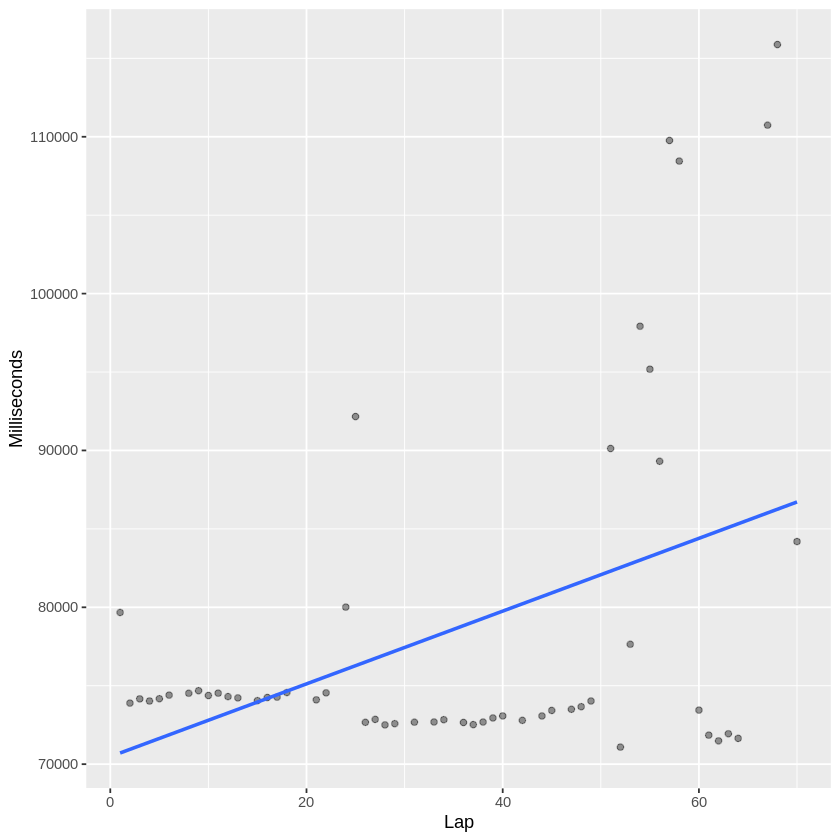

In [50]:
#21. Brazil

aa_brazil <- alb_laps %>%
                filter(raceId %in% brazil_race_ID) 

aa_brazil_clean <- aa_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

aa_brazil_clean_ID <- aa_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_brazil_races <- alb_laps %>%
                    filter(raceId %in% aa_brazil_clean_ID)

formulaone_split <- initial_split(aa_brazil_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



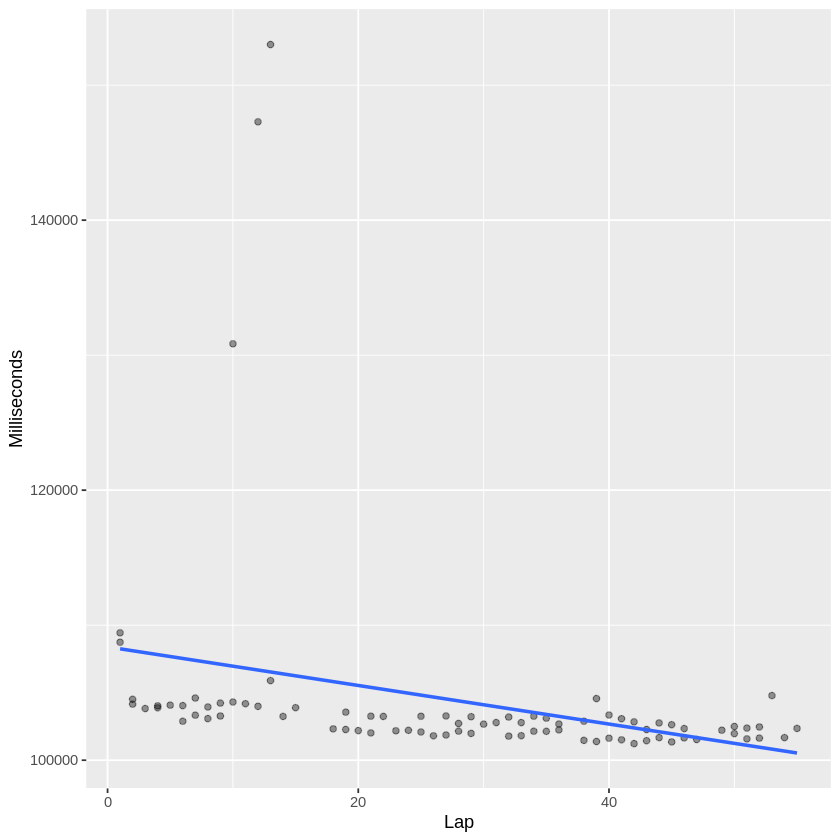

In [51]:
#22. Abu Dhabi

aa_uae <- alb_laps %>%
                filter(raceId %in% uae_race_ID) 

aa_uae_clean <- aa_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

aa_uae_clean_ID <- aa_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_uae_races <- alb_laps %>%
                    filter(raceId %in% aa_uae_clean_ID)

formulaone_split <- initial_split(aa_uae_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()